# EDA for Iris Dataset

## Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Loading data set

In [4]:
iris=pd.read_csv('Iris.csv')
#remove unwanted part from a column
iris['Species'] = iris['Species'].str.replace(r'Iris-', '')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


## Structural information about the data

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Insights:
* No null entries
* Only one categorical column

In [45]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
iris.groupby('Species').agg(['mean','median'])

Id        SepalLengthCm        SepalWidthCm         \
             mean median          mean median         mean median   
Species                                                             
setosa       25.5   25.5         5.006    5.0        3.418    3.4   
versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
virginica   125.5  125.5         6.588    6.5        2.974    3.0   

           PetalLengthCm        PetalWidthCm         
                    mean median         mean median  
Species                                              
setosa             1.464   1.50        0.244    0.2  
versicolor         4.260   4.35        1.326    1.3  
virginica          5.552   5.55        2.026    2.0

## check for duplication

In [7]:
iris[iris.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


## Balance check

In [8]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Species Count')

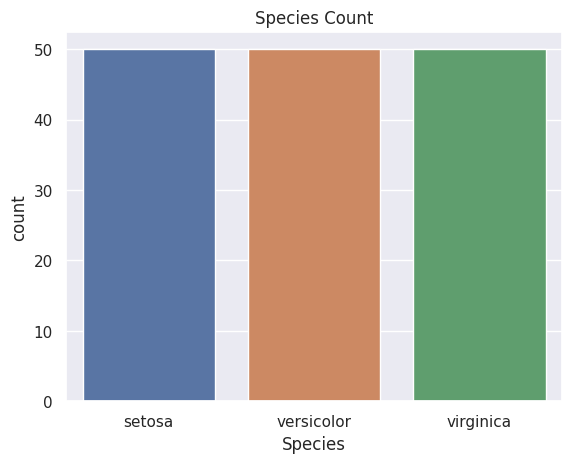

In [9]:
# countplot() method is used to Show the counts of observations in each categorical bin using bars
#sns.countplot(iris['Species']) # this gives an ValueError as it is trying to plot categoical value on y axis
sns.countplot(data=iris,x='Species')
plt.title('Species Count')

## Scatter plot for species wise sepal length and sepal width

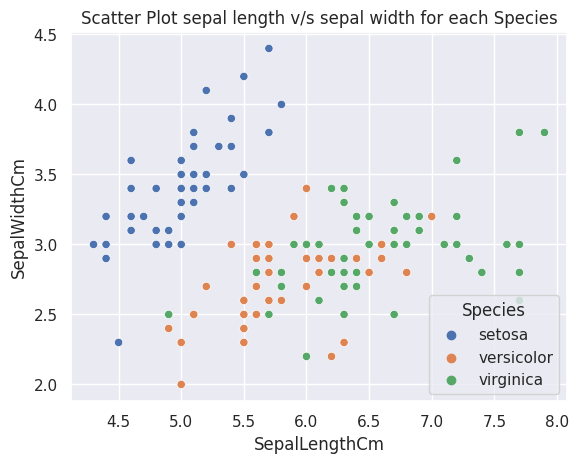

In [10]:
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm',hue='Species') #hue parameter determines which column in the data frame should be used for colour encoding.
#c='Species' taked sequence of numbers,colors or color
plt.title("Scatter Plot sepal length v/s sepal width for each Species")
plt.style.use('ggplot')

## Scatterplot Observations: 
1. setosa species has larger sepal width as compared to sepal length.
1. virginica species has larger sepal length in contrast to the sepal width.

## Scatter plor for species wise petal length and petal width.

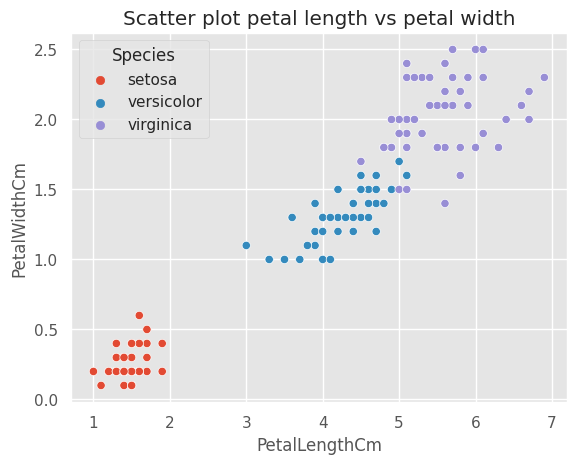

In [15]:
sns.scatterplot(data=iris, x='PetalLengthCm',y='PetalWidthCm',hue='Species')
plt.title("Scatter plot petal length vs petal width")
plt.style.use('ggplot')

## Scatter plot obeservation:
1. setosa species have smallest petal length and width.
2. virginica species has largest petal length and width while versicolor lie in middle of the other two.

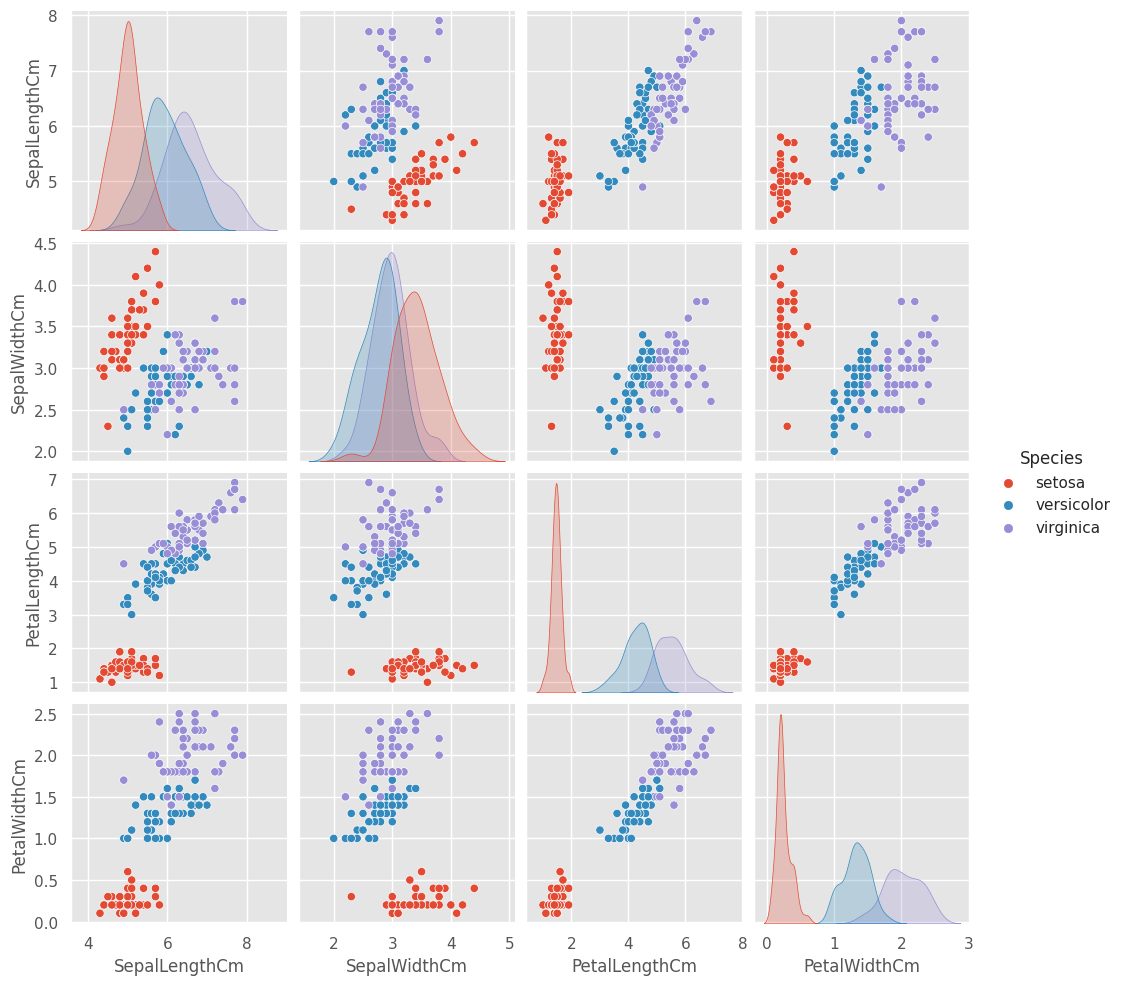

In [28]:
cols_to_plot = iris.columns[1:6].tolist() # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(iris[cols_to_plot], hue='Species')

## checking correlation

[]

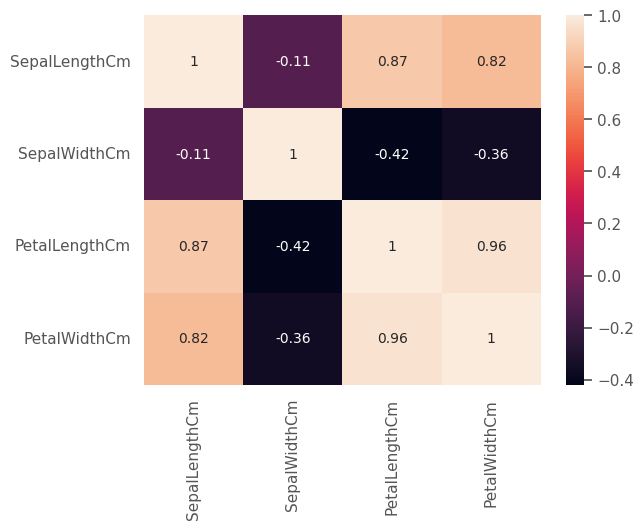

In [40]:
#plt.figure(figsize=(10,11))
col_for_corr=iris.columns[1:5].tolist()
sns.heatmap(iris[col_for_corr].corr(),annot=True)
plt.style.use('ggplot')
plt.plot()


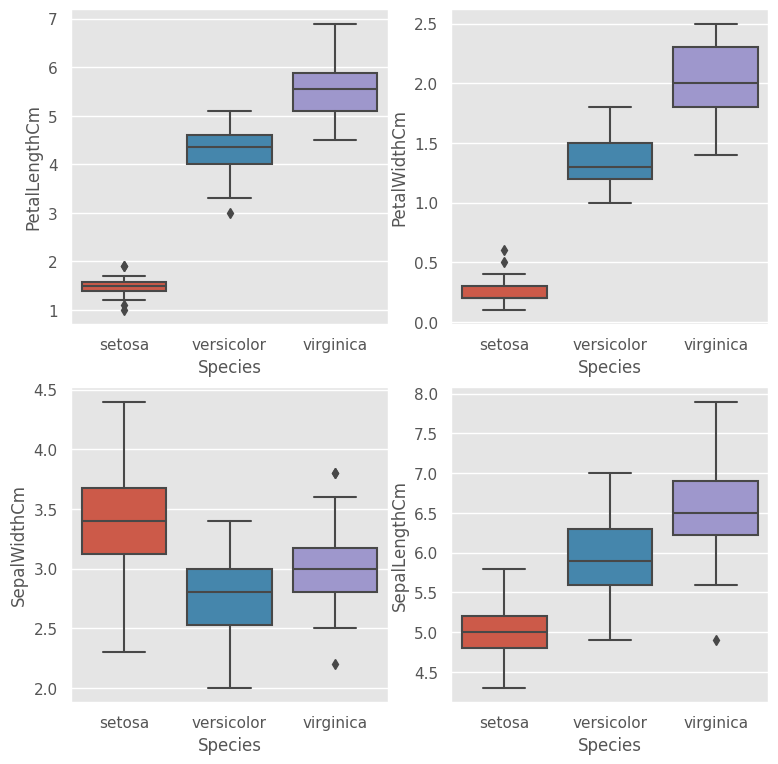

In [70]:
fig,axes=plt.subplots(2,2,figsize=(9,9)) #defining the canvas by variable fig and axes with axes.
sns.boxplot(data=iris,y='PetalLengthCm',x='Species',orient='v',ax=axes[0,0])
sns.boxplot(data=iris, x='Species',y='PetalWidthCm',ax=axes[0,1])
sns.boxplot(data=iris, x='Species',y='SepalWidthCm',ax=axes[1,0])
sns.boxplot(data=iris, x='Species',y='SepalLengthCm',ax=axes[1,1])
plt.style.use('ggplot')

## Density of distribution across length and width

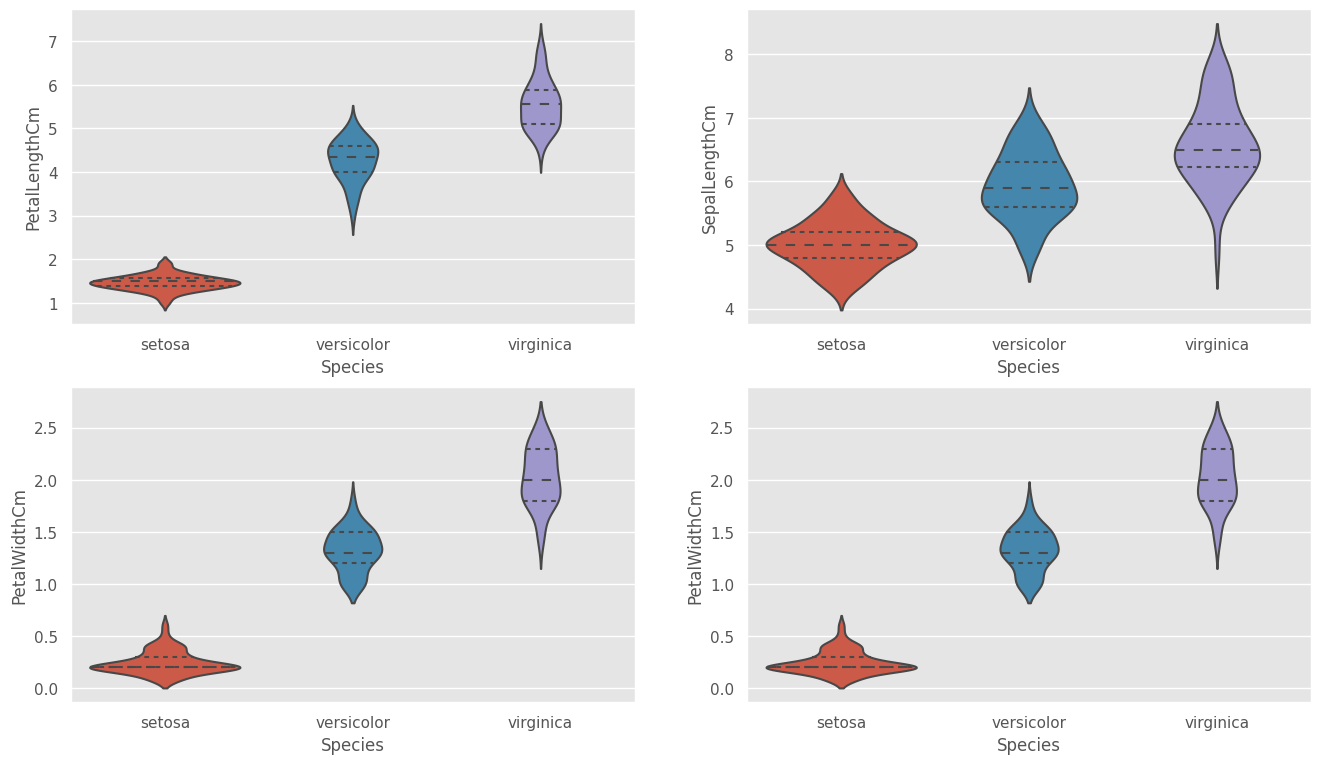

In [79]:
#The names ax and pluralized axs are preferred over axes because for the latter it's not clear if it refers to a single Axes instance or a collection of these.
fig, axs=plt.subplots(2,2,figsize=(16,9))
sns.violinplot(data=iris,x='Species',y='PetalLengthCm',orient='v',ax=axs[0,0],inner='quartile')
sns.violinplot(data=iris,x='Species',y='SepalLengthCm',orient='v',ax=axs[0,1],inner='quartile')
sns.violinplot(data=iris,x='Species',y='PetalWidthCm',orient='v',ax=axs[1,0],inner='quartile')
sns.violinplot(data=iris,x='Species',y='PetalWidthCm',orient='v',ax=axs[1,1],inner='quartile')
plt.style.use('ggplot')